# Data Understanding and Data Preparation

Here we will explore the data and prepare it for modeling.

## Data Understanding

Assumptions:
1. Company employee and followers count don't impact job salary
2. Job remote option impacts job salary which can be related to specific job type
3. Location of work, job type and experience level should have significant impact on job salary
4. Sponsored job posts are mostly posted by bigger companies
6. Views depends on the job salary, type and company followers
7. Job benefits in description should have impact on job salary
8. Supervision positions should have higher salary

In [1]:
import pandas as pd

jobs_df = pd.read_csv('data/LinkedInJobs_MLDataset.csv')

jobs_df.head()

Co_Nm  Co_Pg_Lstd  Emp_Cnt  Flw_Cnt  \
0                           HearingLife        True     1171    11417   
1          Metalcraft of Mayville, Inc.        True      300     2923   
2  U.S. Tsubaki Power Transmission, LLC        True      314     8487   
3      Episcopal Communities & Services        True       36      305   
4                            iHerb, LLC        True     1227    51933   

                                             Job_Ttl  \
0                              Hearing Care Provider   
1  Shipping & Receiving Associate 2nd shift (Beav...   
2                               Manager, Engineering   
3                                               Cook   
4        Principal Cloud Security Architect (Remote)   

                                            Job_Desc  Is_Supvsr    max_sal  \
0  Overview\n\nHearingLife is a national hearing ...      False    5250.00   
1  Metalcraft of Mayville\nMetalcraft of Mayville...      False       0.00   
2  The TSUBAKI name is synonymous with excellence...       True       0.00   
3  descriptionTitle\n\n Looking for a great oppor...      False      22.27   
4  Job Summary\nAt iHerb, we are on a mission to ...      False  275834.00   

     med_sal    min_sal  ... st_code  is_remote views       app_typ  \
0    5250.00    5250.00  ...      SC          0     9  OffsiteApply   
1       0.00       0.00  ...      WI          0     0  OffsiteApply   
2       0.00       0.00  ...      AL          0     0  OffsiteApply   
3      22.27      22.27  ...      CA          0     1  OffsiteApply   
4  240895.00  205956.00  ...      XF          1     0  OffsiteApply   

  app_is_off            xp_lvl                    domain has_post_domain  \
0       True       Entry level  careers-demant.icims.com            True   
1       True        Not Listed       www.click2apply.net            True   
2       True        Not Listed       www.click2apply.net            True   
3       True       Entry level           jobs.apploi.com            True   
4       True  Mid-Senior level         careers.iherb.com            True   

   is_sponsored base_comp  
0             0         1  
1             0         0  
2             0         0  
3             0         1  
4             0         1  

[5 rows x 24 columns]

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
jobs_df.describe()

Emp_Cnt     Flw_Cnt    max_sal    med_sal   min_sal  is_remote  \
count  33246.00    33246.00   33246.00   33246.00  33246.00   33246.00   
mean   15484.56   523436.39   31866.15   27494.95  23123.76       0.14   
std    62180.95  2708735.72   68238.53   57905.64  48977.38       0.35   
min        0.00        0.00       0.00       0.00      0.00       0.00   
25%      148.00     8135.75       0.00       0.00      0.00       0.00   
50%     1235.00    37996.50       0.00       0.00      0.00       0.00   
75%     8160.00   168036.00      97.97      90.00     84.78       0.00   
max   829111.00 31887198.00 1300000.00 1050000.00 998426.00       1.00   

         views  is_sponsored  base_comp  
count 33246.00      33246.00   33246.00  
mean     45.42          0.24       0.40  
std     126.97          0.43       0.49  
min       0.00          0.00       0.00  
25%       1.00          0.00       0.00  
50%       7.00          0.00       0.00  
75%      38.00          0.00       1.00  
max    5656.00          1.00       1.00

More than 50% of the job posts haven't mentioned the salary. 14% jobs are remote and 24% of job posts are sponsored.

In [3]:
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Co_Nm            33242 non-null  object 
 1   Co_Pg_Lstd       33246 non-null  bool   
 2   Emp_Cnt          33246 non-null  int64  
 3   Flw_Cnt          33246 non-null  int64  
 4   Job_Ttl          33246 non-null  object 
 5   Job_Desc         33244 non-null  object 
 6   Is_Supvsr        33246 non-null  bool   
 7   max_sal          33246 non-null  float64
 8   med_sal          33246 non-null  float64
 9   min_sal          33246 non-null  float64
 10  py_prd           33246 non-null  object 
 11  py_lstd          33246 non-null  bool   
 12  wrk_typ          33246 non-null  object 
 13  loc              33246 non-null  object 
 14  st_code          33246 non-null  object 
 15  is_remote        33246 non-null  int64  
 16  views            33246 non-null  int64  
 17  app_typ     

**domain** - has a lot of missing values and it will be hard to use. We will drop them. 

In [4]:
print('Number of companies: ', len(jobs_df['Co_Nm'].unique()))
print('Number of job titles: ', len(jobs_df['Job_Ttl'].unique()))
print('Number of job locations: ', len(jobs_df['loc'].unique()))
print('Payment periods: ', jobs_df['py_prd'].unique())
print('Work types: ', jobs_df['wrk_typ'].unique())
print('Job state codes: ', jobs_df['st_code'].unique())
print("Application types: ", jobs_df['app_typ'].unique())
print("Experience levels: ", jobs_df['xp_lvl'].unique())
print("Number of job state codes: ", len(jobs_df['st_code'].unique()),'\n')
print(f"Data collumns: {jobs_df.columns.unique()}")
print(f"unique domain names: {jobs_df['domain'].unique().size}")

Number of companies:  11268
Number of job titles:  22290
Number of job locations:  4621
Payment periods:  ['MONTHLY' 'Not Listed' 'HOURLY' 'YEARLY' 'Unpaid' 'WEEKLY' 'ONCE']
Work types:  ['Full-time' 'Contract' 'Other' 'Part-time' 'Internship' 'Temporary'
 'Volunteer']
Job state codes:  ['SC' 'WI' 'AL' 'CA' 'XF' 'IL' 'CT' 'FL' 'NJ' 'IN' 'NC' 'NV' 'ID' 'OR'
 'CO' 'TN' 'VA' 'OH' 'TX' 'MI' 'IA' 'PA' 'MO' 'NY' 'WA' 'MD' 'KY' 'SD'
 'AZ' 'GA' 'NE' 'MN' 'MS' 'LA' 'UT' 'NM' 'DE' 'RI' 'DC' 'MA' 'OK' 'NH'
 'AR' 'HI' 'VT' 'KS' 'ND' 'AK' 'ME' 'WY' 'WV' 'MT' 'QC']
Application types:  ['OffsiteApply' 'ComplexOnsiteApply' 'SimpleOnsiteApply']
Experience levels:  ['Entry level' 'Not Listed' 'Mid-Senior level' 'Associate' 'Director'
 'Executive' 'Internship']
Number of job state codes:  53 

Data collumns: Index(['Co_Nm', 'Co_Pg_Lstd', 'Emp_Cnt', 'Flw_Cnt', 'Job_Ttl', 'Job_Desc',
       'Is_Supvsr', 'max_sal', 'med_sal', 'min_sal', 'py_prd', 'py_lstd',
       'wrk_typ', 'loc', 'st_code', 'is_remote', '

- There is a lot different names of companies. It is hard to use them as a feature. Since every company can have many fields of work, it is hard to use it as a feature. We will most likely drop it.
- Job title might be useful, but it is hard to use it as a feature. We will try to apply some `NLP` (Natural Language Processing) techniques to extract some features from it. The results of that will be discussed in on another notebook.
- Work types might be useful. We will try to apply one-hot encoding on it with mean salary of each type.
- Job state codes will also be useful. We will try to apply one-hot encoding on it with mean salary of each state.
- Job state codes are clearly reffering to the US states. There are some which are not in the US, such as QC - Quebec, Canada. There is one called XF which is not clear what it is. We will investigate it further.
- Experience level will be useful. We will try to apply one-hot encoding on it with mean salary of each level.

## Data Preparation

From here we can start to prepare dataset for futher investigation. We will drop some columns which we don't need and we will try to fill the missing values. We do not have any null values in the dataset, but we have a lot of missing values. We will try to handle it. 

For now we will:
- Drop columns with `med_sal < 0 `, because there are indicating that the salary is not specified.
- Drop columns with `py_lstd == False`, because there are indicating that the salary is not specified as well.
- Drop columns with `wrk_typ == 'Volunteer'`, because there are indicating that the salary is not specified as well.
- Drop columns with `py_prd == 'Once'`, because there are indicating that the salary is only one time payment. We are interested in jobs with comtinuous payment.

After some deleting we can try to work on outliers and also convert payments to yearly salary, so the data can be consistent. 

Removing outliers was done by investigation of all available plots in this notebook. Not just assumption before the data exploration. The 15000$ year salary is said as the lowest salary in the US. We will remove all salaries below that. We will also remove all salaries above 200000$ year salary. We need consistent data for our model.

In [5]:
import data_preprocessing as dp



jobs_with_salary_df = jobs_df[jobs_df['med_sal'] > 0]

states = jobs_with_salary_df['st_code'].unique()


jobs_with_salary_df_filtered = jobs_with_salary_df[jobs_with_salary_df['py_lstd'] == True]
jobs_with_salary_df_filtered = jobs_with_salary_df_filtered[jobs_with_salary_df_filtered['wrk_typ'] != 'Volunteer']
jobs_with_salary_df_filtered = jobs_with_salary_df_filtered[jobs_with_salary_df_filtered['py_prd'] != 'ONCE']

for col in ['min_sal', 'med_sal', 'max_sal']:
    jobs_with_salary_df_filtered[col] = jobs_with_salary_df_filtered.apply(lambda row: dp.convert_to_yearly(row[col], row['py_prd']), axis=1)

jobs_with_salary_df_filtered['py_prd'] = jobs_with_salary_df_filtered['py_prd'].apply(lambda x: 'YEARLY')

# Remove outliers
jobs_with_salary_df_filtered = jobs_with_salary_df_filtered[jobs_with_salary_df_filtered['min_sal'] > 15000]
jobs_with_salary_df_filtered = jobs_with_salary_df_filtered[jobs_with_salary_df_filtered['med_sal'] < 0.2e6]

jobs_with_salary_df_filtered.describe()

Emp_Cnt     Flw_Cnt   max_sal   med_sal   min_sal  is_remote    views  \
count  12491.00    12491.00  12491.00  12491.00  12491.00   12491.00 12491.00   
mean   16106.41   686686.27  98688.48  87464.03  76239.58       0.15    53.17   
std    67146.40  3330659.89  50770.21  42035.87  36063.42       0.36   142.04   
min        0.00        0.00  17500.00  17500.00  15080.00       0.00     0.00   
25%      138.00     9039.50  56160.00  52000.00  45760.00       0.00     1.00   
50%     1266.00    50930.00  90000.00  79352.00  70000.00       0.00    11.00   
75%     9220.50   226908.00 130600.00 116909.40 100000.00       0.00    46.00   
max   829111.00 31887198.00 300000.00 199900.00 199500.00       1.00  5656.00   

       is_sponsored  base_comp  
count      12491.00   12491.00  
mean           0.27       1.00  
std            0.44       0.00  
min            0.00       1.00  
25%            0.00       1.00  
50%            0.00       1.00  
75%            1.00       1.00  
max            1.00       1.00

Removing outliers from salary column was used to improve the model performance. There were few job posts with salary more than 500 thousand dollars yearly. It is not realistic and it is hard to predict such values. That kind of jobs are not common and it is better to remove them.  

We will focus on predicting salary using min med max sal values so we will drop base_comp column.

In [6]:
jobs_with_salary_df_filtered = jobs_with_salary_df_filtered.drop(columns=['base_comp'])

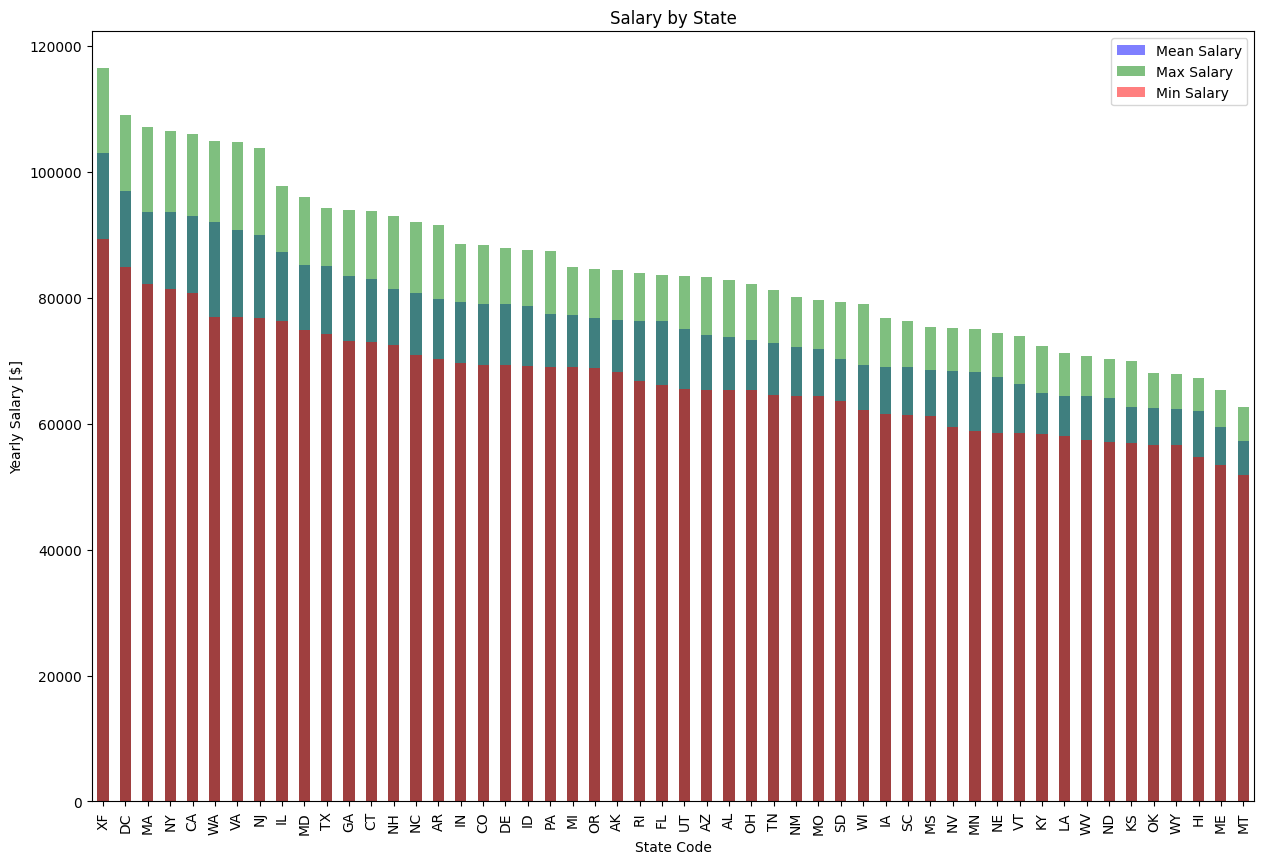

In [7]:
import matplotlib.pyplot as plt

mean_salary = jobs_with_salary_df_filtered[jobs_with_salary_df_filtered['st_code'].isin(states)].groupby('st_code')['med_sal'].mean()
max_salary = jobs_with_salary_df_filtered[jobs_with_salary_df_filtered['st_code'].isin(states)].groupby('st_code')['max_sal'].mean()
min_salary = jobs_with_salary_df_filtered[jobs_with_salary_df_filtered['st_code'].isin(states)].groupby('st_code')['min_sal'].mean()

plt.figure(figsize=(15, 10))

mean_salary.sort_values(ascending=False).plot(kind='bar', color='blue', alpha=0.5, label='Mean Salary')
max_salary.sort_values(ascending=False).plot(kind='bar', color='green', alpha=0.5, label='Max Salary')
min_salary.sort_values(ascending=False).plot(kind='bar', color='red', alpha=0.5, label='Min Salary')

plt.xlabel('State Code')
plt.ylabel('Yearly Salary [$]')
plt.title('Salary by State')

plt.legend()

plt.show()

By analyzing the data we can see that some states usually pay more than others. Although, the differences are not significant. Removing outliers definitely improved data distribution.

For later discritization we will add collumn to data frame with mean salary per state. This will be done before modeling.


In [8]:
jobs_with_salary_df_filtered = jobs_with_salary_df_filtered[jobs_with_salary_df_filtered['py_lstd'] == True].copy()
jobs_with_salary_df_filtered['mean_year_sal'] = jobs_with_salary_df_filtered.groupby('st_code')['med_sal'].transform('mean')

Now each collumn has a value of mean salary per state. We will use this collumn to discretize the data. 

# Amout of jobs per state

In [9]:
# Function to plot boolean feature by state with optional treshold
def plot_features_by_state(jobs_df, bool_feature = 'is_remote', treshold=None):
    counts = jobs_df.groupby(['st_code', bool_feature]).size().unstack()
    counts['total'] = counts.sum(axis=1)

    if treshold is not None and isinstance(treshold, int):
        filtered_counts = counts[counts['total'] < treshold].copy()
    else:
        filtered_counts = counts.copy()

    filtered_counts.sort_values(by='total', ascending=False, inplace=True)

    del filtered_counts['total']
    filtered_counts.plot(kind='bar', stacked=True, figsize=(15, 10))

    plt.xlabel('State Code')
    plt.ylabel('Number of Jobs')
    plt.title(f'Number of {bool_feature} Jobs by State')

    plt.legend([f'Non-{bool_feature}', f'{bool_feature}'], loc='upper right')
    plt.show()

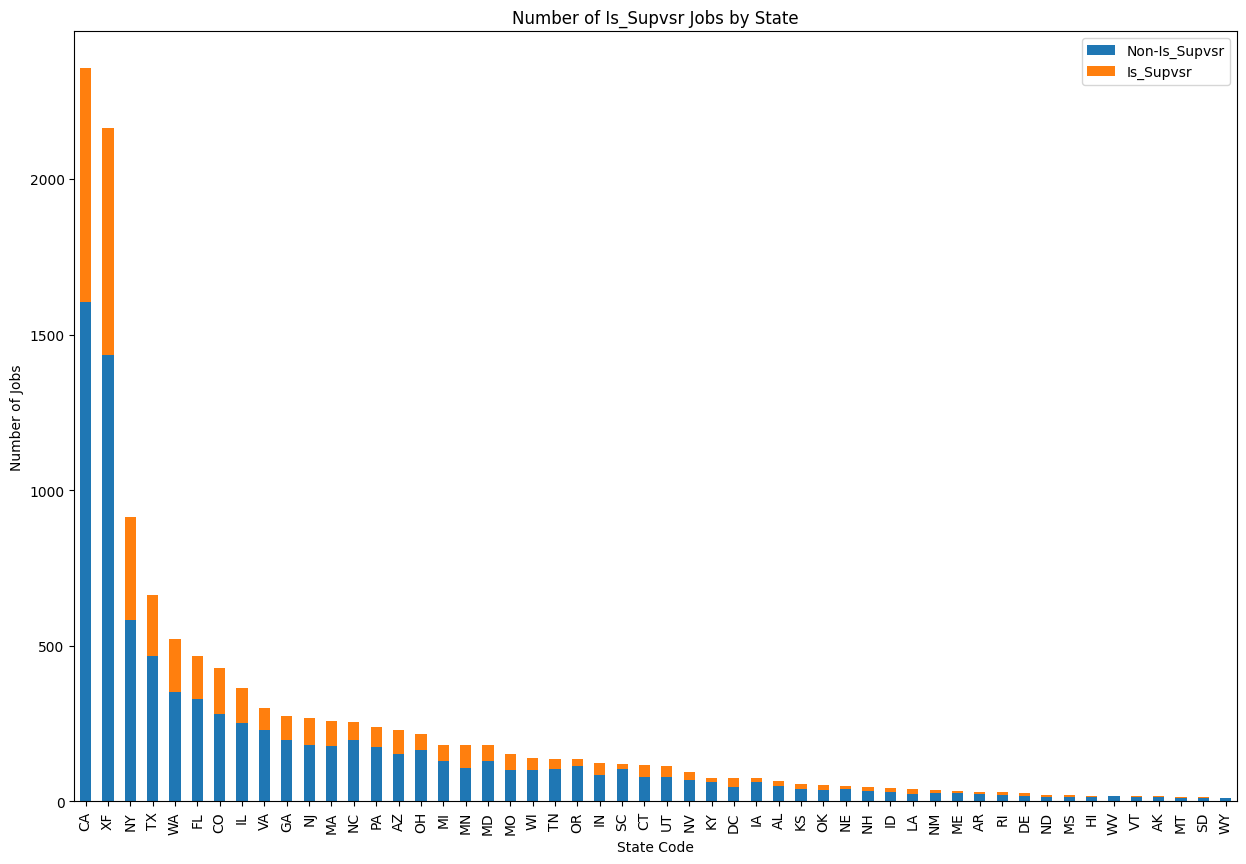

In [10]:
plot_features_by_state(jobs_with_salary_df_filtered, bool_feature='Is_Supvsr')

There are less jobs marked as supervised. We will use it for the model, since it is a good indicator of the salary. Ussualy supervisors have higher salary than regular workers.

# Top best paid jobs and worst paid jobs

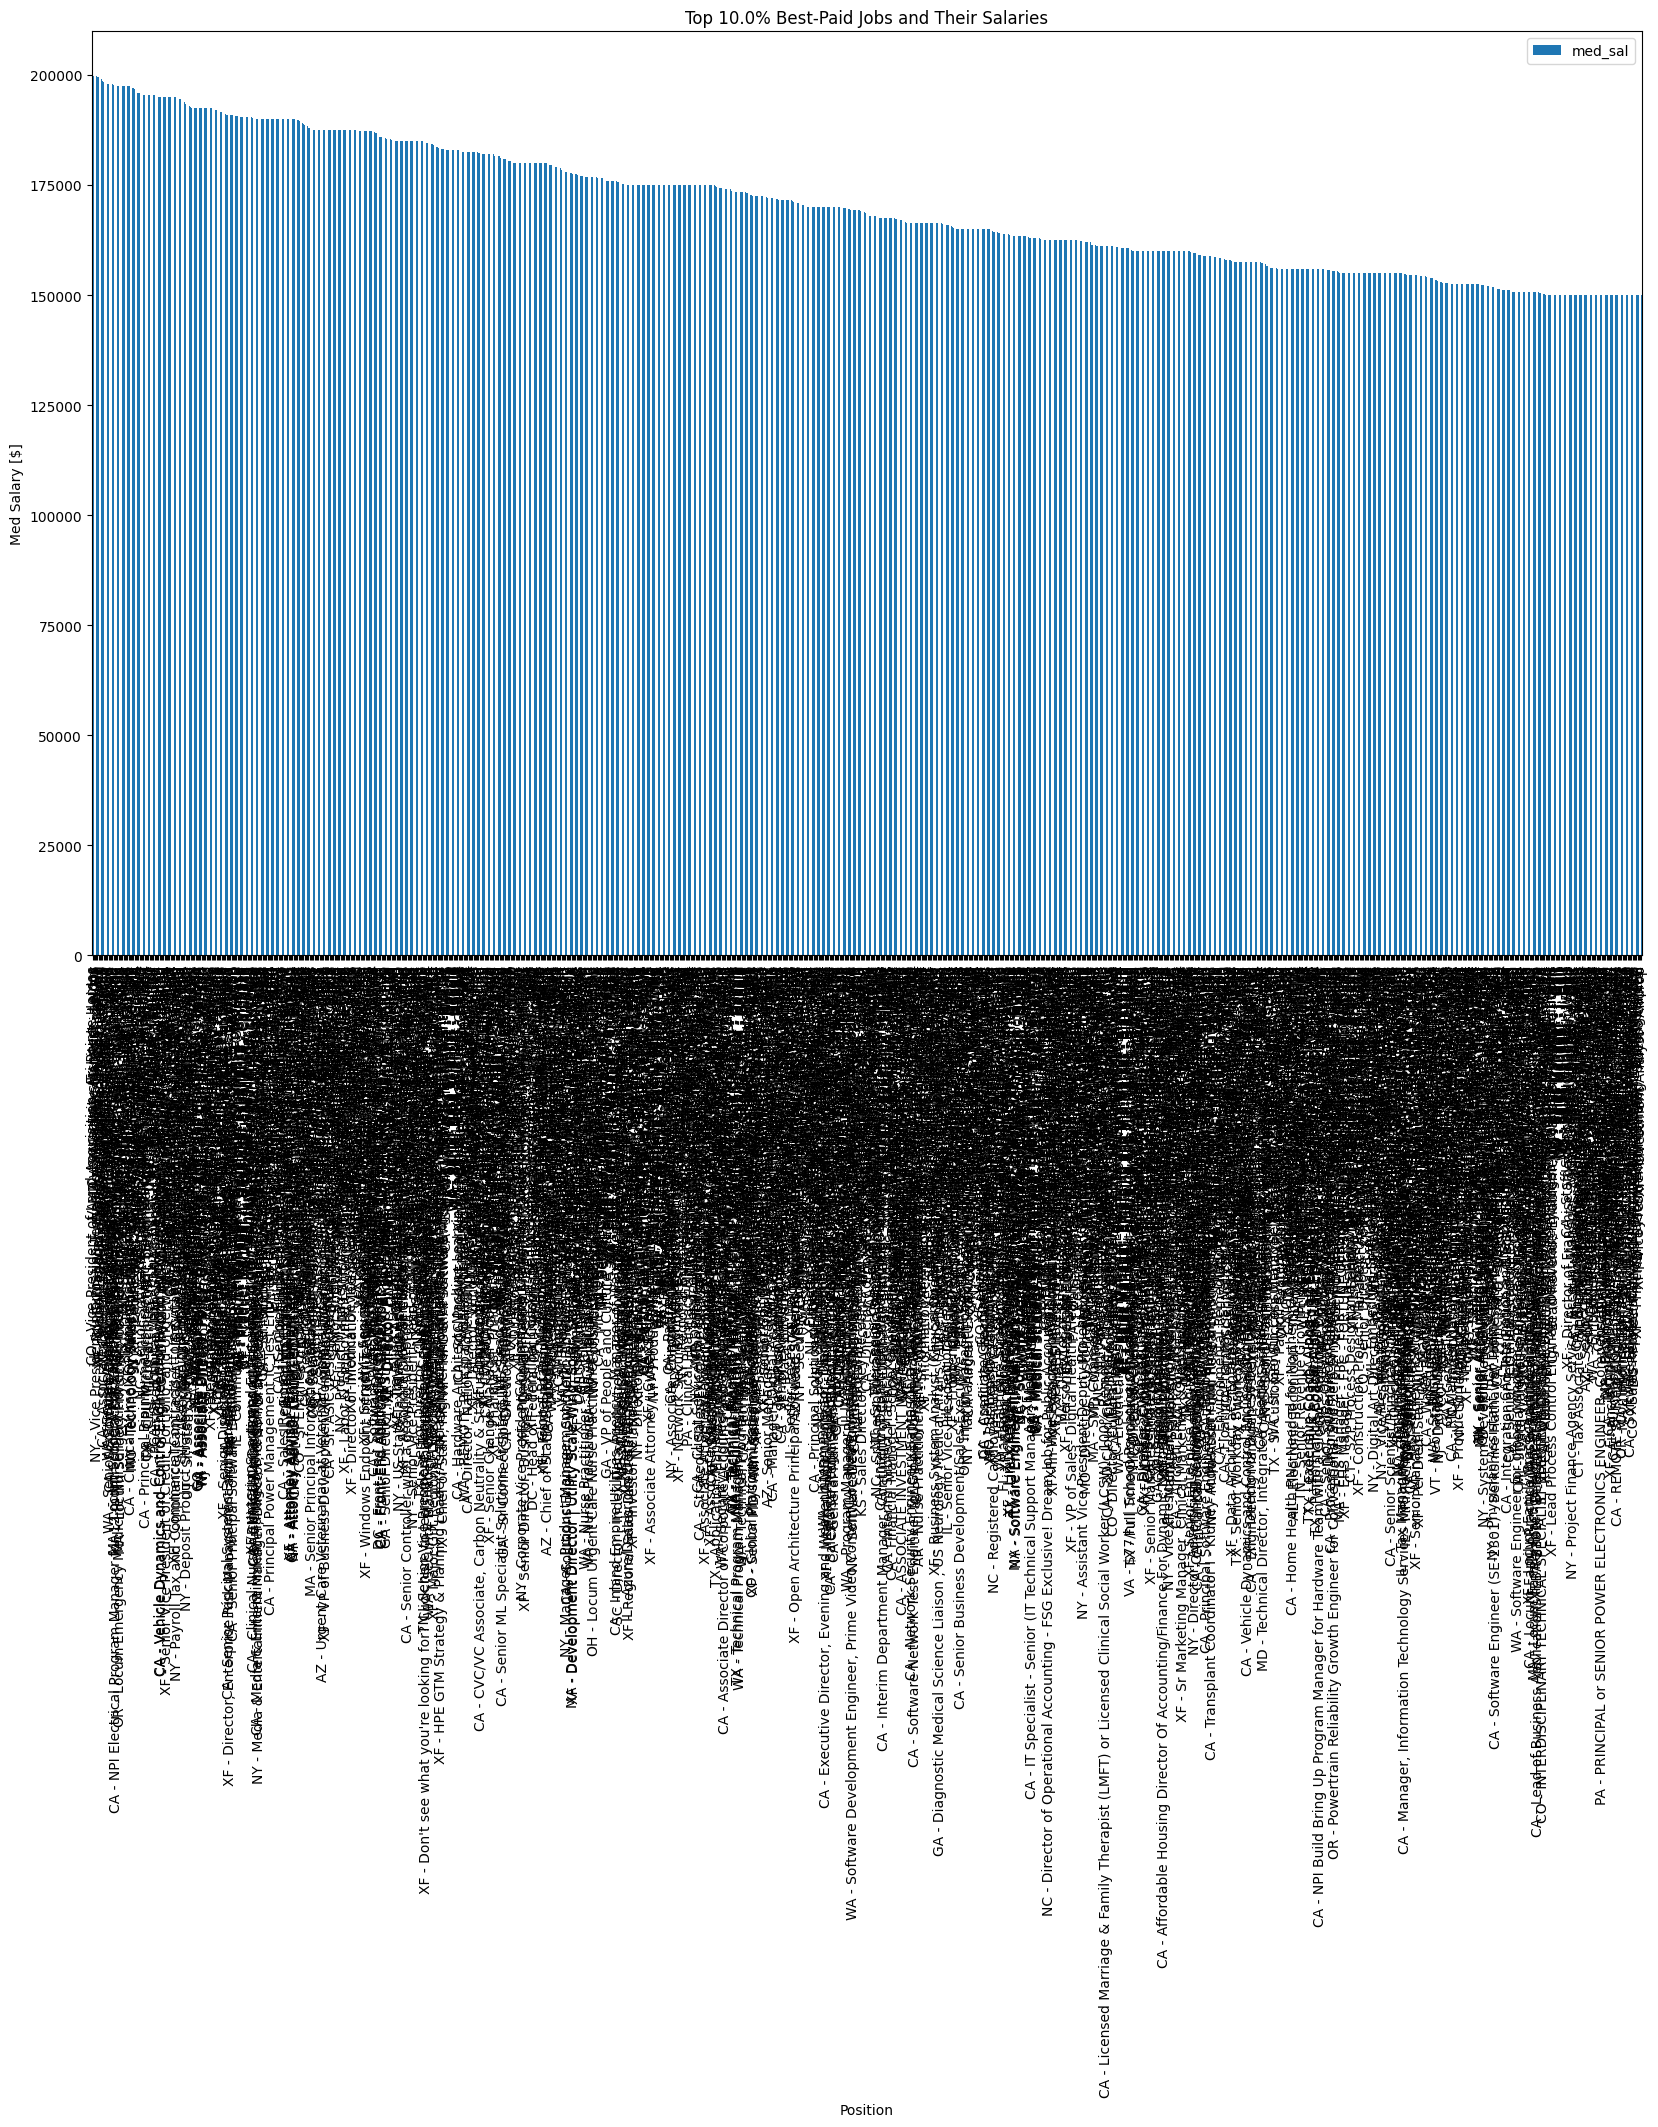

In [11]:
percent = 0.1

filtered_jobs = jobs_with_salary_df_filtered.copy()

top_percent_jobs = filtered_jobs.nlargest(int(len(filtered_jobs) * percent), 'med_sal')

top_percent_jobs['Position'] = top_percent_jobs["st_code"] + ' - ' + top_percent_jobs['Job_Ttl'] + ' - ' + top_percent_jobs['Co_Nm']

top_percent_jobs[['Position', 'med_sal']].plot(kind='bar', x='Position', y='med_sal', figsize=(20, 12))

plt.title('Top {}% Best-Paid Jobs and Their Salaries'.format(percent * 100))
plt.xlabel('Position')
plt.ylabel('Med Salary [$]')
plt.show()

We don't see significant spike on most paid job offers. That indicates that we succesfully removed outliers.

The names on plot are not clear, due to so many of data shown at once. The plotting is made in the way that by changing percent parameter we can choose how many of the data to show. For tests, we were changing it to see best and worst paid jobs. It helped with determining outliers. Now the plot is set to show 10% to see the distribution of the data. 

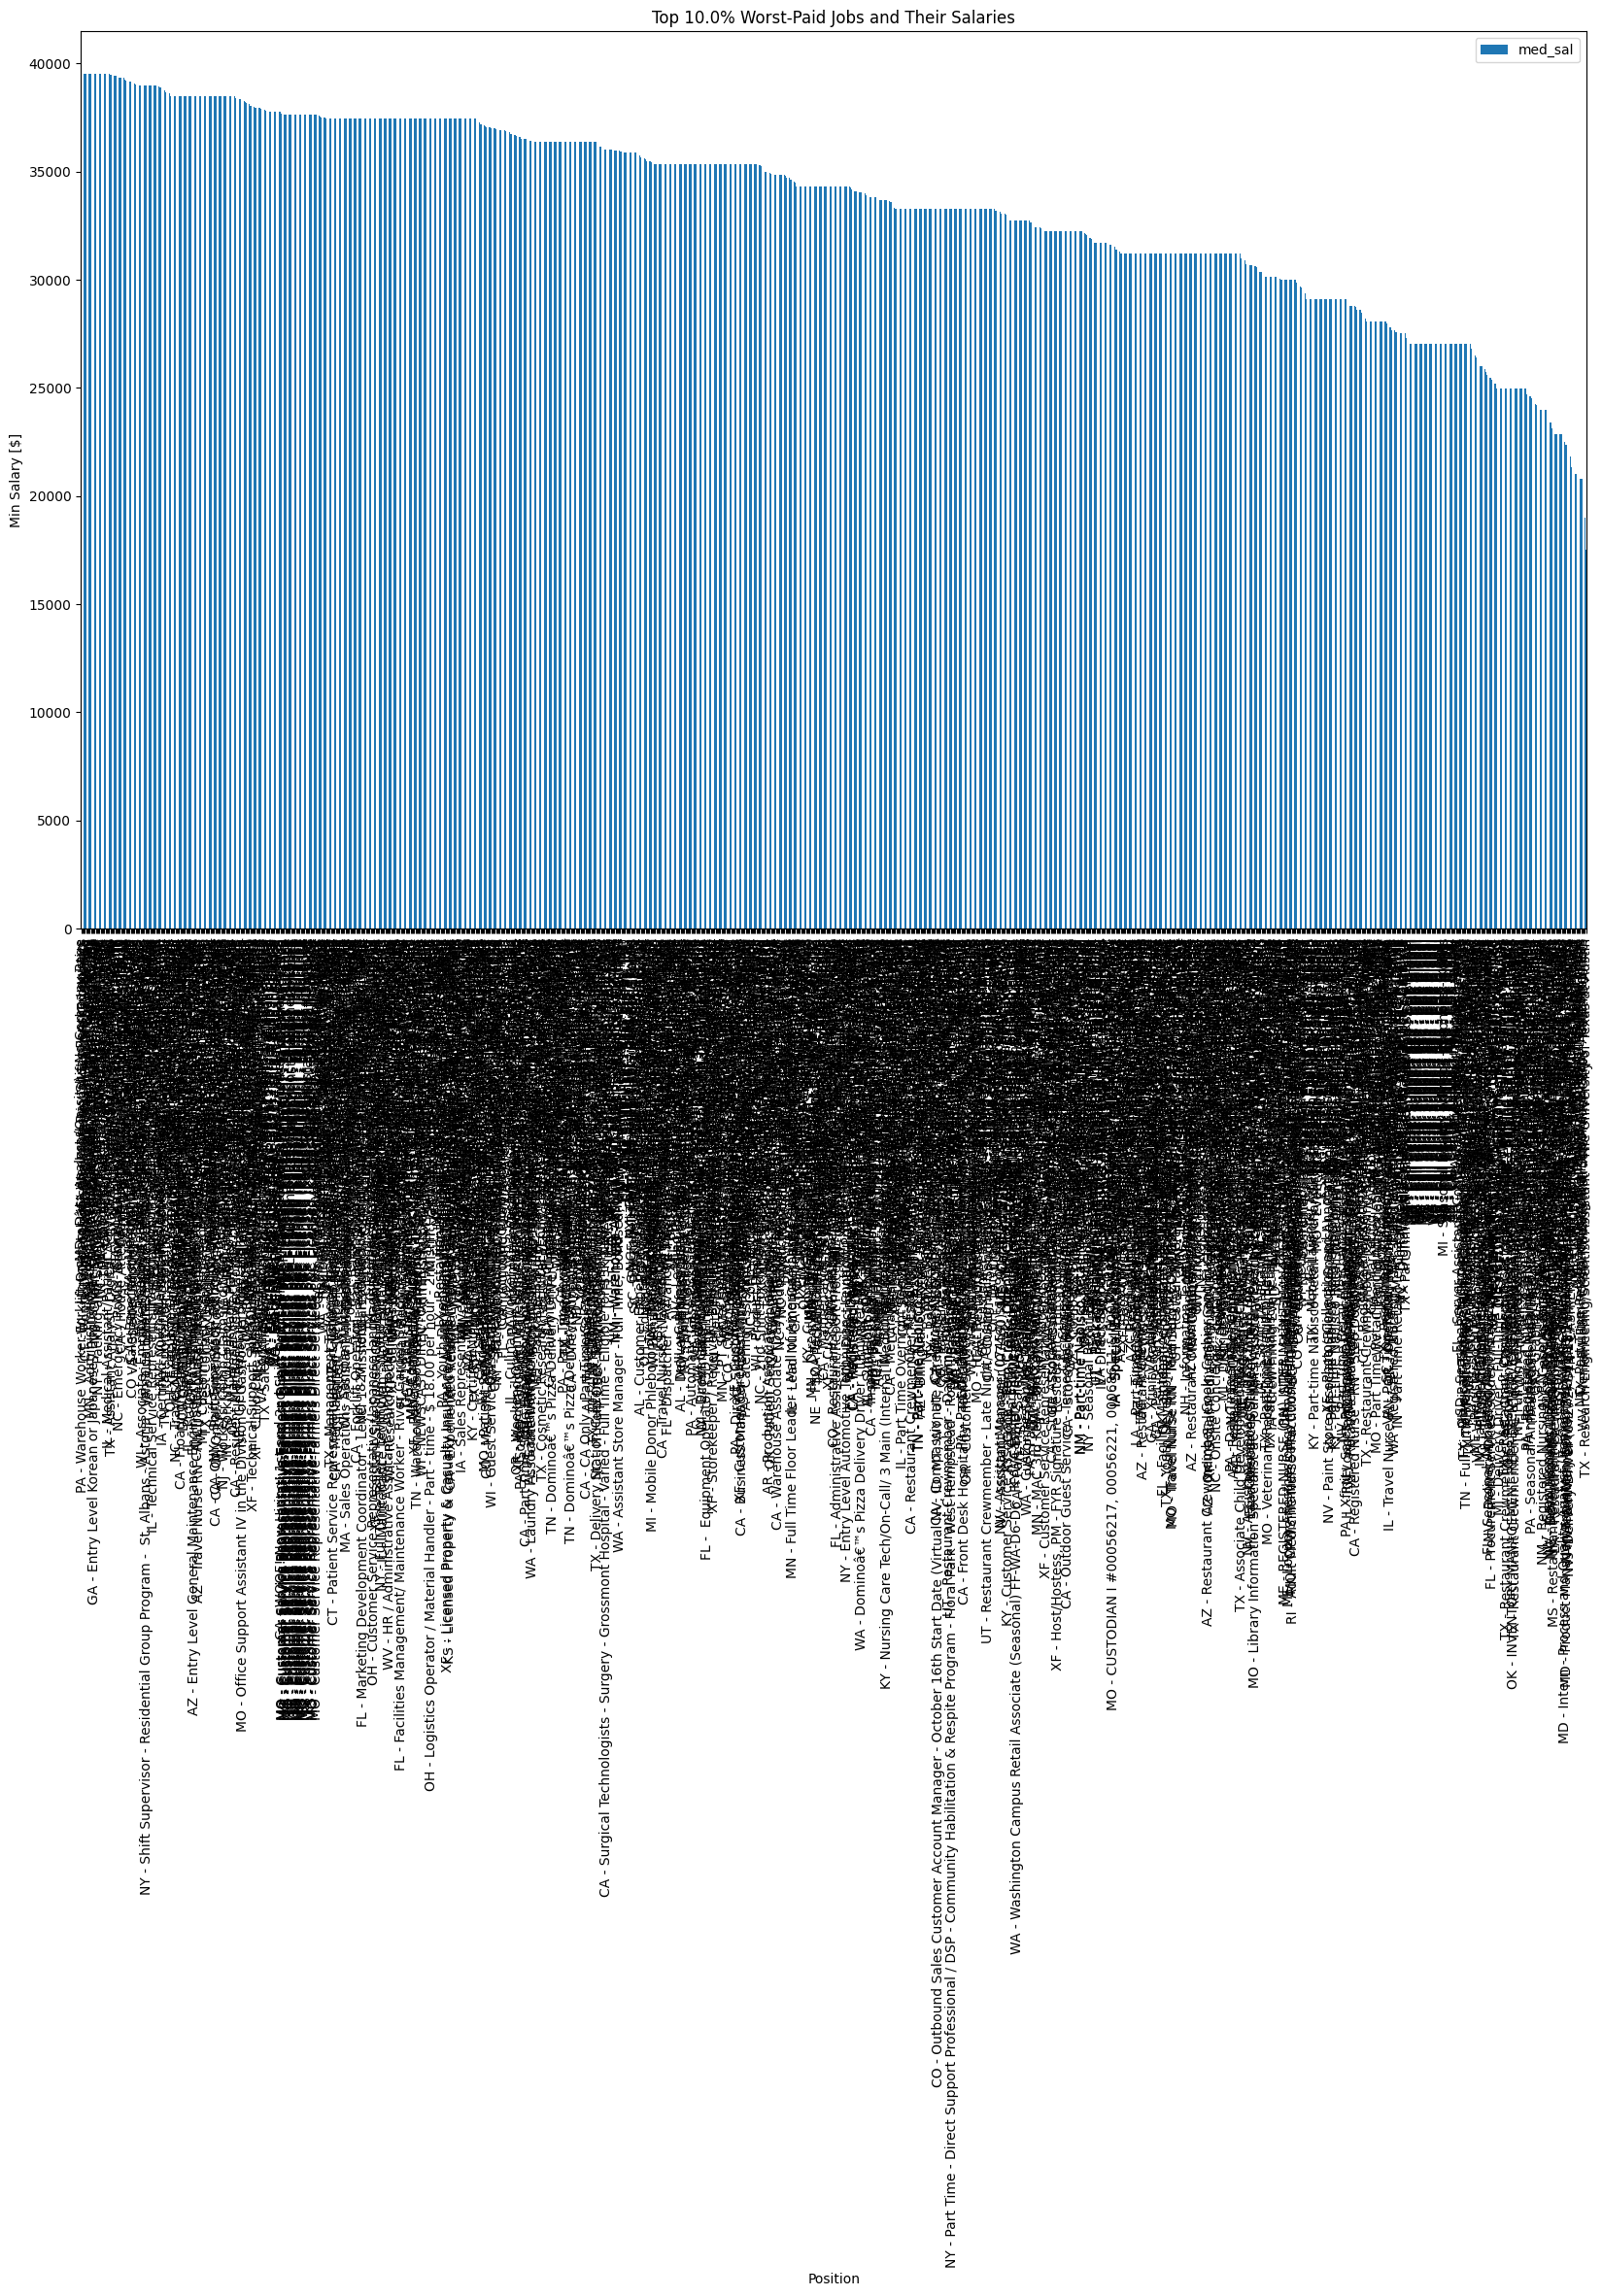

In [12]:
percent = 0.1

filtered_jobs = jobs_with_salary_df_filtered.copy()

worst_percent_jobs = filtered_jobs.nsmallest(int(len(filtered_jobs) * percent), 'med_sal')

worst_percent_jobs['Position'] = worst_percent_jobs["st_code"] + ' - ' + worst_percent_jobs['Job_Ttl'] + ' - ' + worst_percent_jobs['Co_Nm']

worst_percent_jobs = worst_percent_jobs.sort_values('med_sal', ascending=False)

worst_percent_jobs[['Position', 'med_sal']].plot(kind='bar', x='Position', y='med_sal', figsize=(20, 12))

plt.title('Top {}% Worst-Paid Jobs and Their Salaries'.format(percent * 100))
plt.xlabel('Position')
plt.ylabel('Min Salary [$]')
plt.show()

Here is the same as for most paid jobs. We don't see significant spike on worst paid job offers. That indicates that we succesfully removed outliers.

The aren't significant differences between job salaries on the bottom of the data.

In [13]:
worst_percent_jobs[['Co_Nm','Job_Ttl', 'med_sal', 'py_prd','xp_lvl']].tail(10)

Co_Nm  \
19144                    The Mom Project   
19003                    The Mom Project   
24330                               Posh   
29933            Morton's The Steakhouse   
31159                     Abigail Kirsch   
18670                     Hallmark Cards   
32578                     Tran Singh LLP   
16013                     Acme Providers   
13022                     Health360 Inc.   
30689  The University of Texas at Austin   

                                                 Job_Ttl  med_sal  py_prd  \
19144                        Instructor (Math & Science) 21000.00  YEARLY   
19003                        Instructor (Math & Science) 21000.00  YEARLY   
24330                                 Accounting Manager 20800.00  YEARLY   
29933                               Server (Fine Dining) 20800.00  YEARLY   
31159                                  Runner, Tipped AM 20800.00  YEARLY   
18670     Part Time Retail Merchandiser - Elkin NC 28621 20800.00  YEARLY   
32578     Law Firm Receptionist/Administrative Assistant 20800.00  YEARLY   
16013                       Residential Supervisor - IDD 20000.00  YEARLY   
13022  Mental Health Crisis Training Instructor-Ameri... 19000.00  YEARLY   
30689           Research Engineering/Scientist Assistant 17500.00  YEARLY   

                 xp_lvl  
19144       Entry level  
19003       Entry level  
24330  Mid-Senior level  
29933       Entry level  
31159       Entry level  
18670       Entry level  
32578        Not Listed  
16013        Not Listed  
13022        Not Listed  
30689        Not Listed

To see the tail of the data we can say that the lowest salaries are ususaly for entry level jobs. Not listed will be also used for modeling, but it is not clear what it is. It is not clear what is the difference between not listed and entry level. We will try to investigate it further.

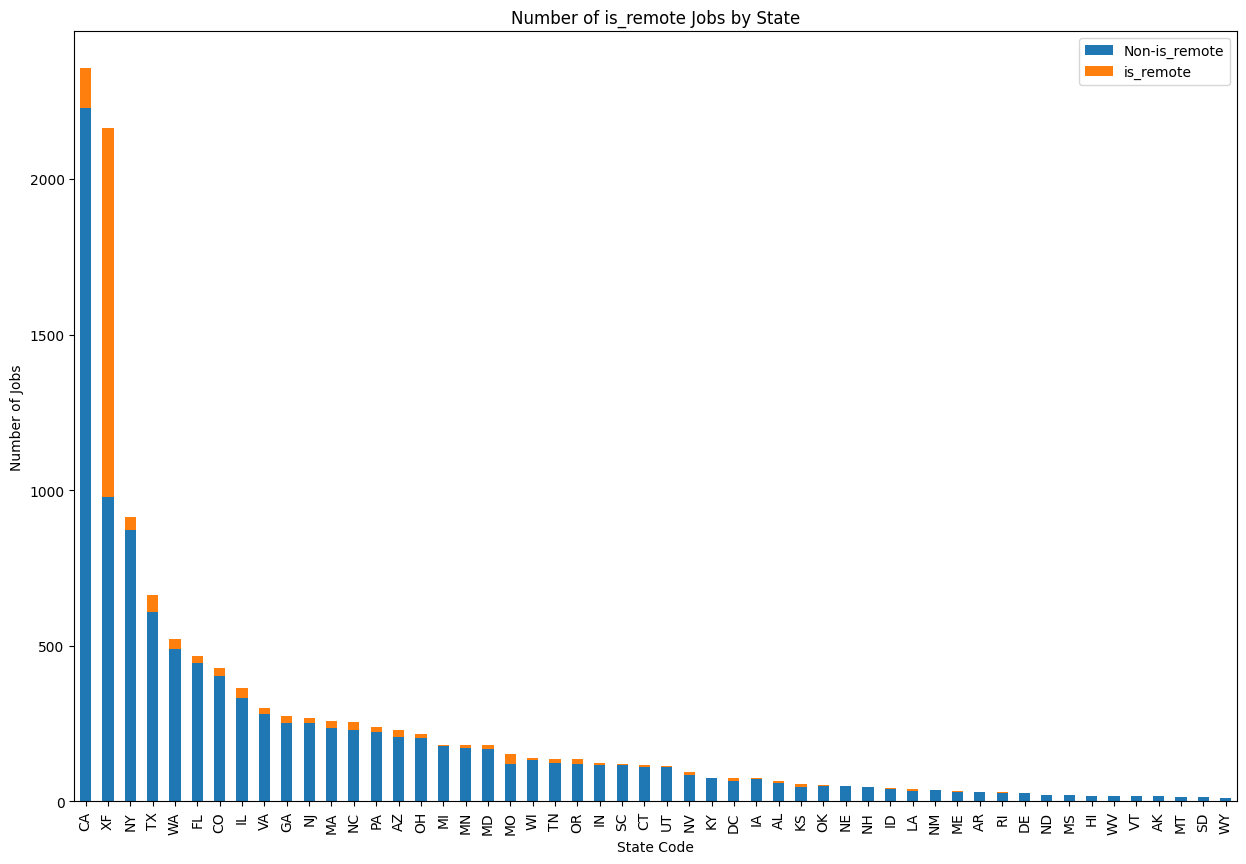

In [14]:
plot_features_by_state(jobs_with_salary_df_filtered)

For state XF we see that most of the jobs are remote. Which is not the case for other states. We still don't know what is XF. However, it is important to notice how valuable it is. It is the second largest peace of data. We also can se that QC (Quebec, Canada) dissapeared. There was only one job offer from Canada and was paid lower than our threshold. 

### Correlation matrix

<Axes: >

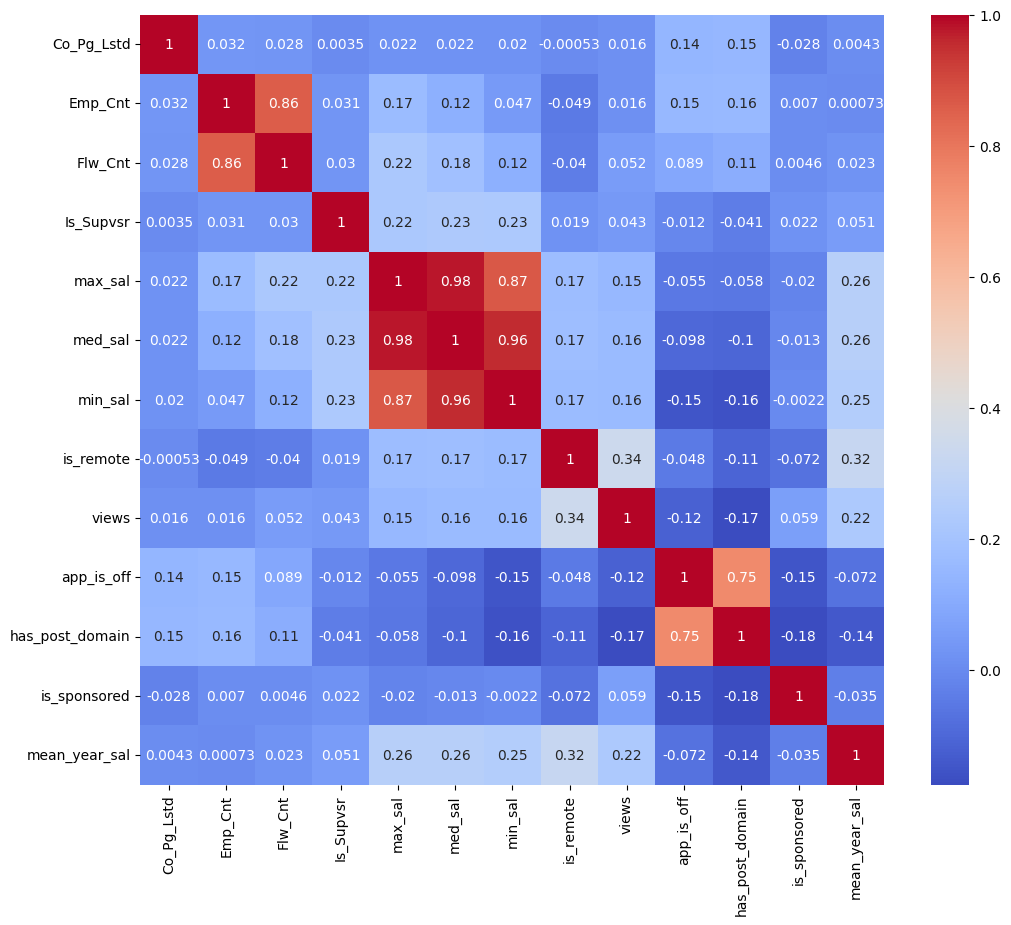

In [15]:
import seaborn as sns

numeric_columns = jobs_with_salary_df_filtered.select_dtypes(include=['int64', 'float64', 'bool'])
numeric_columns = numeric_columns.drop(columns=['py_lstd'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


We will clean data from features that have almost no impact on the salary. We will be using correlation matrix to see which features are not important. 

In [16]:
jobs_with_salary_df_filtered = jobs_with_salary_df_filtered.drop(columns=['app_is_off', 'Emp_Cnt', 'Co_Pg_Lstd', 'is_sponsored', 'app_typ'])

Some of the collums are not realeated to the job salary. We will drop them.

### Experience level and job salary

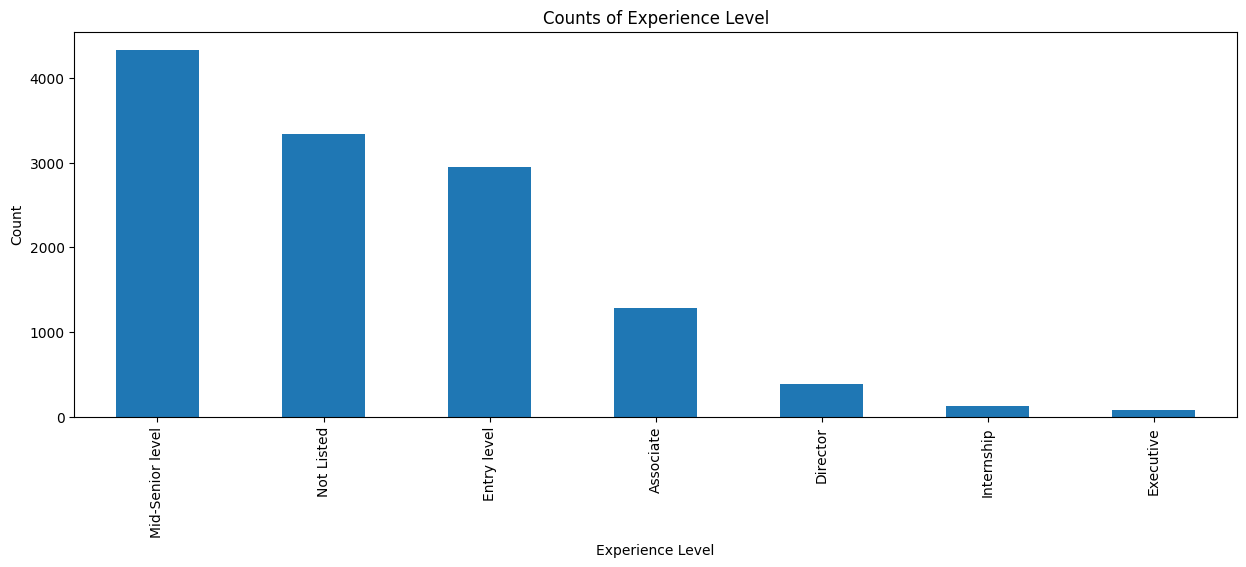

In [17]:
plt.figure(figsize=(15, 5))
jobs_with_salary_df_filtered['xp_lvl'].value_counts().plot(kind='bar')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('Counts of Experience Level')
plt.show()

The dataset has most of Mid-Senior level jobs. Quite a lot of jobs are also marked as Not Listed. The smallest groups are Internship and Executive level jobs, which is expected.

We need to categorize it. We will calculate mean salary for each job type and then we will discretize it.
We will use one hot encoding to encode job type.


In [18]:
from sklearn.preprocessing import LabelEncoder

mean_salary = jobs_with_salary_df_filtered.groupby('xp_lvl')['med_sal'].mean()

mean_salary_sorted = mean_salary.sort_values(ascending=False)

most_significant_job = mean_salary_sorted.index[0]

print(mean_salary_sorted)

xp_lvl
Director           137027.12
Executive          120860.01
Mid-Senior level   105390.55
Not Listed          83493.58
Associate           79370.14
Entry level         62815.03
Internship          59689.90
Name: med_sal, dtype: float64


### Checking siginificancy of domain collumn

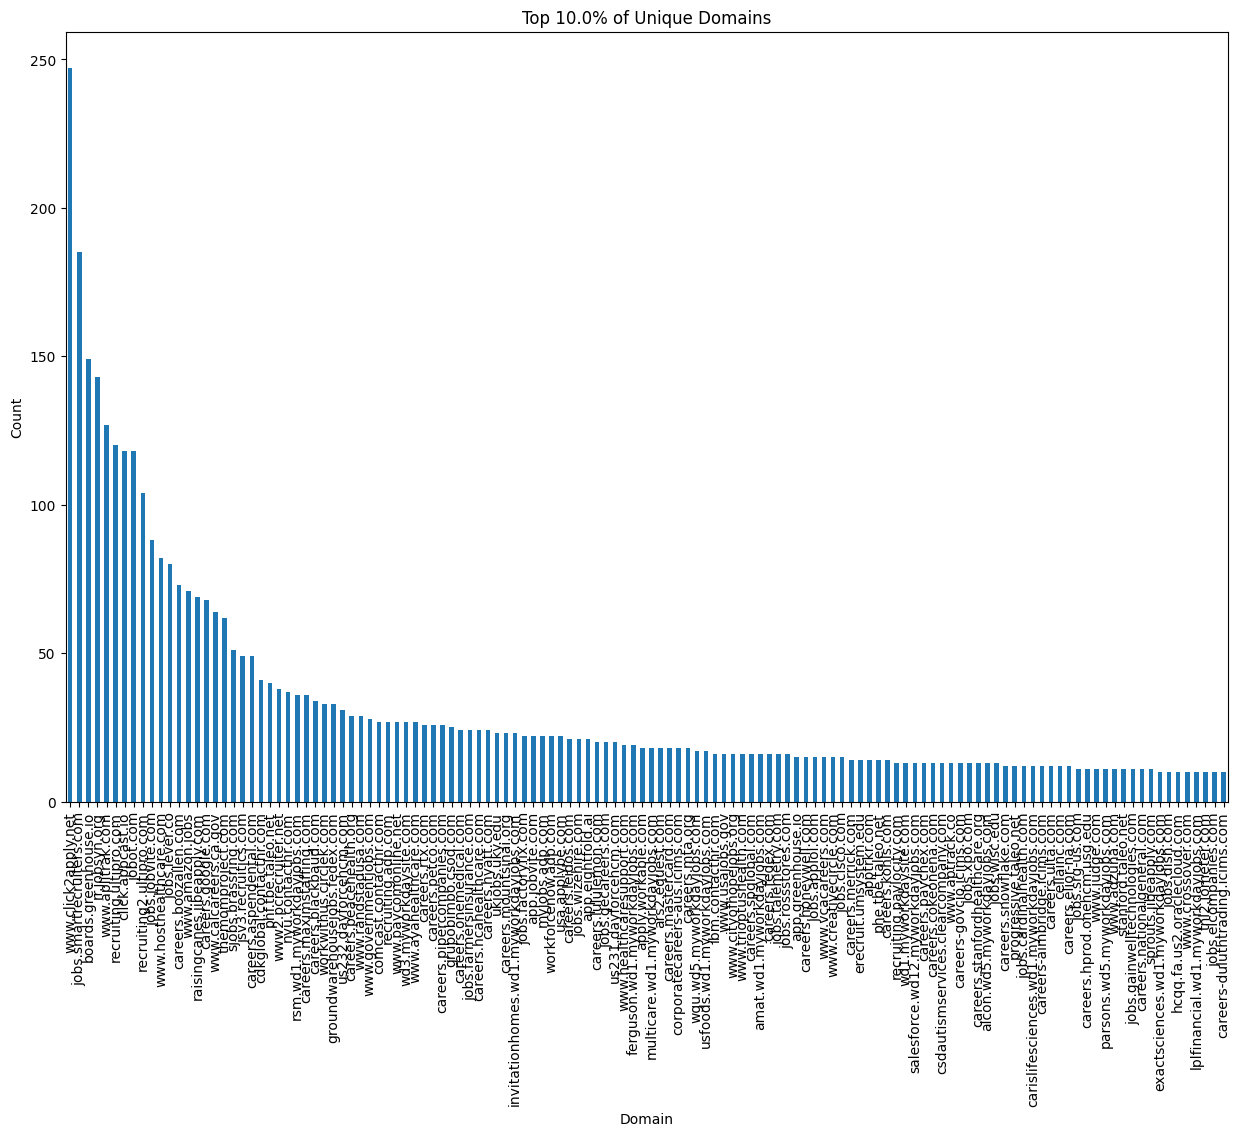

Percentage of jobs post which uses click2apply.com domain: 1.98%


In [19]:

top_percent = 0.1
domain_counts = jobs_with_salary_df_filtered['domain'].value_counts()

num_domains = int(len(domain_counts) * top_percent)

top_domains = domain_counts[:num_domains]

plt.figure(figsize=(15, 10))
top_domains.plot(kind='bar')
plt.xlabel('Domain')
plt.ylabel('Count')
plt.title(f'Top {top_percent * 100}% of Unique Domains')
plt.show()

print(f"Percentage of jobs post which uses click2apply.com domain: {jobs_with_salary_df_filtered[jobs_with_salary_df_filtered['domain'] == 'www.click2apply.net'].shape[0] / jobs_with_salary_df_filtered.shape[0] * 100:.2f}%")


For the amount of different domains and the amount of job posts in each domain we can conclude that domain collumn is not significant. The most used site is click2apply.net but it is still only 2% of all job posts. We will drop whole domain collumn.


In [20]:
jobs_with_salary_df_filtered = jobs_with_salary_df_filtered.drop(columns=['domain', 'has_post_domain', 'py_lstd'])

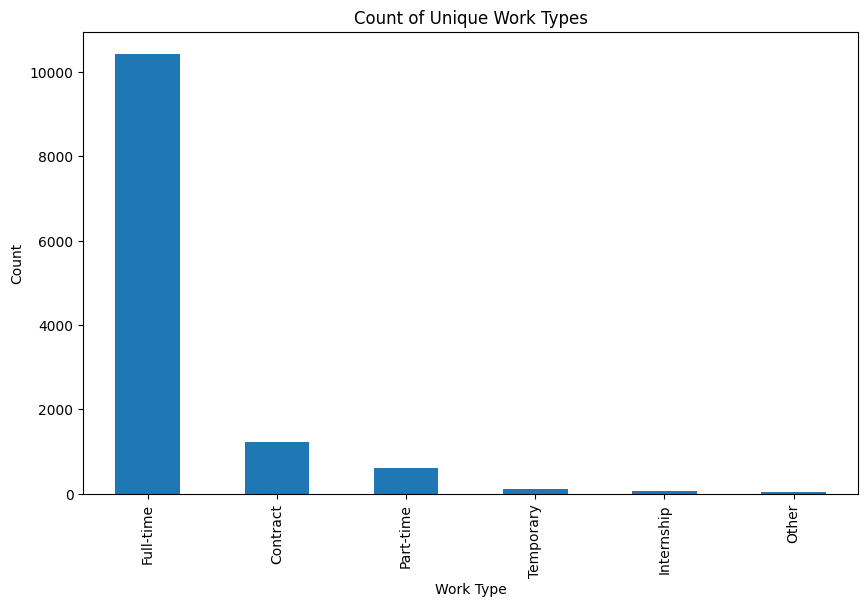

Percentage of jobs post which is Full-Tiem: 83.44%


In [21]:
plt.figure(figsize=(10, 6))
jobs_with_salary_df_filtered['wrk_typ'].value_counts().plot(kind='bar')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.title('Count of Unique Work Types')
plt.show()

print(f"Percentage of jobs post which is Full-Tiem: {jobs_with_salary_df_filtered[jobs_with_salary_df_filtered['wrk_typ'] == 'Full-time'].shape[0] / jobs_with_salary_df_filtered.shape[0] * 100:.2f}%")


The distribution of the work type is not even. Most of the jobs are full time. Although, usually full time jobs are better paid than part time jobs. Full-time takes 83.44% of all jobs. It looks like there is no significant difference between full time and part time jobs. We still will use this collumn for prediction to see if it will improve the model.

In [22]:
jobs_with_salary_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12491 entries, 0 to 33243
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Co_Nm          12488 non-null  object 
 1   Flw_Cnt        12491 non-null  int64  
 2   Job_Ttl        12491 non-null  object 
 3   Job_Desc       12490 non-null  object 
 4   Is_Supvsr      12491 non-null  bool   
 5   max_sal        12491 non-null  float64
 6   med_sal        12491 non-null  float64
 7   min_sal        12491 non-null  float64
 8   py_prd         12491 non-null  object 
 9   wrk_typ        12491 non-null  object 
 10  loc            12491 non-null  object 
 11  st_code        12491 non-null  object 
 12  is_remote      12491 non-null  int64  
 13  views          12491 non-null  int64  
 14  xp_lvl         12491 non-null  object 
 15  mean_year_sal  12491 non-null  float64
dtypes: bool(1), float64(4), int64(3), object(8)
memory usage: 1.5+ MB


In [23]:
from data_preprocessing import preprocess_lda_pipeline

from gensim.models import LdaMulticore

lda_model = LdaMulticore.load('models/job_topic_lda_best_model.model')
corpus, dictionary, texts = preprocess_lda_pipeline(jobs_with_salary_df_filtered)

100%|██████████| 12491/12491 [00:00<00:00, 38161.37it/s]


In [24]:
from tqdm import tqdm

lda_results = [lda_model[doc] for doc in tqdm(corpus)]
topics = [[topic for topic in result[0] if topic[1]] for result in lda_results]

100%|██████████| 12491/12491 [00:35<00:00, 356.49it/s]


In [29]:
import numpy as np

topic_columns = [f"Topic_{i + 1}" for i in range(lda_model.num_topics)]
topics_df = pd.DataFrame(columns=topic_columns)

for i, result in enumerate(topics):
    topic_values = np.zeros(lda_model.num_topics)
    for topic, probability in result:
        topic_values[topic] = probability
    topics_df.loc[i] = topic_values

jobs_with_salary_df_filtered.reset_index(inplace=True)
job_with_topics_df = pd.concat([jobs_with_salary_df_filtered, topics_df], axis=1)
job_with_topics_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          12491 non-null  int64  
 1   Co_Nm          12488 non-null  object 
 2   Flw_Cnt        12491 non-null  int64  
 3   Job_Ttl        12491 non-null  object 
 4   Job_Desc       12491 non-null  object 
 5   Is_Supvsr      12491 non-null  bool   
 6   max_sal        12491 non-null  float64
 7   med_sal        12491 non-null  float64
 8   min_sal        12491 non-null  float64
 9   py_prd         12491 non-null  object 
 10  wrk_typ        12491 non-null  object 
 11  loc            12491 non-null  object 
 12  st_code        12491 non-null  object 
 13  is_remote      12491 non-null  int64  
 14  views          12491 non-null  int64  
 15  xp_lvl         12491 non-null  object 
 16  mean_year_sal  12491 non-null  float64
 17  Topic_1        12491 non-null  float64
 18  Topic_

## Now the data is saved and ready for modeling.

In [26]:
import os

folder_path = 'data/cleared'
file_path = os.path.join(folder_path, 'linkedin_data.csv')

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

if not os.path.exists(file_path):
    job_with_topics_df.to_csv(file_path, index=False)
else:
    print(f"File {file_path} already exists. Not overwriting.")